In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [5]:
import datetime as dt

from dateutil.relativedelta import relativedelta as rd

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

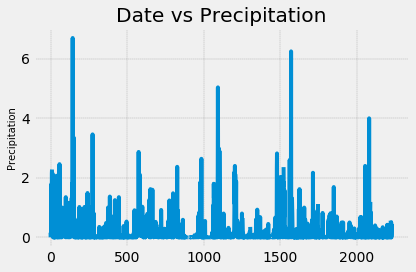

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

query12month = '''
                select date, tobs
                  from measurement
                where date >= (  select  DATE(max(date), '-12 MONTHS') 
                                  from measurement
                               )
                 order by 1
'''
prcp_12month = engine.execute(query12month).fetchall()
prcp_12month
date = [prcp_12month[0] for prcp_12month in prcp_12month[0:]]
precipitation = [prcp_12month[1] for prcp_12month in prcp_12month[0:]]

# precipitation
# date
plt.style.use('fivethirtyeight')
plt.figure.set_figsize=(10, 15)
fig, ax = plt.subplots()

ax.plot(precipitation)

plt.grid(b=True, which='major', linewidth='0.25', color='black', linestyle=':', zorder=0)
# getting "TypeError: can't multiply sequence by non-int of type 'float'" when using linestyle=':' some version issue.
ax.set_ylabel("Precipitation", fontsize=10)
# ax.set_xlabel("Date", fontsize=10)
ax.set_title("Date vs Precipitation")
# plt.xticks(rotation=60, ha="right")

plt.tight_layout()
plt.savefig('DatevsPrecipitation.png')
plt.show()



#### Use Pandas to calcualte the summary statistics for the precipitation data.

In [15]:

prcp_12month_df = pd.DataFrame(prcp_12month, columns = ['date' , 'precipitation'])
prcp_12month_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### Design a query to show how many stations are available in this dataset?

In [16]:

prcp_12month_df.head()
st_count = session.query(Station).count()

st_count

9


#### What are the most active stations? (i.e. what stations have the most rows)?
#### List the stations and the counts in descending order.

In [17]:
# create DataFrame for both the CSVs. 

queryM = '''
             select * from measurement
'''
measurement_df = pd.read_sql_query(queryM, engine)

queryS = '''
             select * from station
'''
station_df = pd.read_sql_query(queryS, engine)
# station_df
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [18]:

measurement_df[['station']].groupby(['station']).size()\
                            .reset_index(name='count')\
                            .sort_values(['count'], ascending=False)



,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


#### Using the station id from the previous query, calculate the lowest temperature recorded, 
#### highest temperature recorded, and average temperature most active station?


In [19]:

most_active_st_agg_df = measurement_df.loc[measurement_df['station'] == 'USC00519281']['tobs'].agg([pd.np.min, pd.np.max, pd.np.mean])
most_active_st_agg_df
most_active_st_agg_df.values.T.tolist()


[54.0, 85.0, 71.66378066378067]

#### Choose the station with the highest number of temperature observations.
#### Query the last 12 months of temperature observation data for this station and plot the results as a histogram



In [20]:

st_most_data_df = measurement_df.loc[measurement_df['station'] == 'USC00519281']


In [21]:
#convert SqlLite string date to of type date in pandas
st_most_data_df.dtypes
st_most_data_df['date']= pd.to_datetime(st_most_data_df['date'])
st_most_data_df.dtypes


c:\users\shahz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



id                  int64
station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

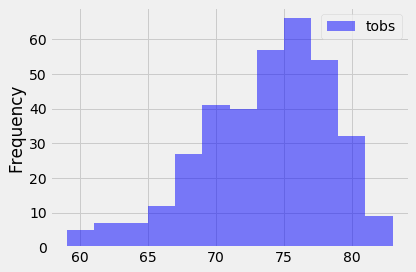

In [22]:

most_recent_date = st_most_data_df['date'].max()
most_recent_date
start_date = most_recent_date + pd.DateOffset(months=-12)
start_date
last_year_st281_df = st_most_data_df.loc[st_most_data_df['date'] >= start_date]
last_year_st281_df = last_year_st281_df[['tobs']]
last_year_st281_df.plot.hist(bins=12, alpha=0.5, color= 'blue')
    
plt.tight_layout()
plt.savefig('HistMostctiveStation.png')
plt.show()


#### Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
#### for your trip using the previous year's data for those same dates.

In [23]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

# print(calc_temps('2012-02-28', '2012-03-05'))

measurement_df['date']= pd.to_datetime(measurement_df['date'])
last_year_end = measurement_df['date'].max()
last_year_start = last_year_end - dt.timedelta(days=(365))
last_year_start

print(calc_temps(str(last_year_start), str(last_year_end)))


[(58.0, 74.57894736842105, 87.0)]


#### Plot the results from your previous query as a bar chart. 
#### Use "Trip Avg Temp" as your Title
#### Use the average temperature for the y value
#### Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


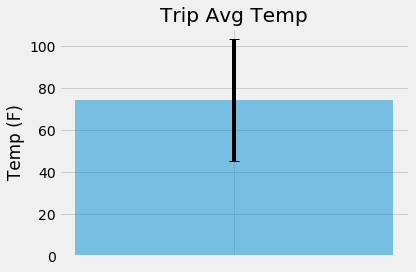

In [24]:
period_mean = 74.58
period_error = 29
x_pos  = 0.2
error = 29 # max - min

# plt.figure(figsize=(3, 7)) 
fig, ax = plt.subplots()
ax.bar("", period_mean, yerr=period_error, align='center', alpha=0.5, ecolor='black', capsize=5)

ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp (F)')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()



#### Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
#### Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [25]:
queryP = '''
            select s.station, s.name, s.latitude, s.longitude, s.elevation, d.sum_prcp
              from station s,
                    (
                    select station, sum(prcp) sum_prcp
                      from measurement
                     where date between '2017-07-04' and '2017-07-18'
                     group by station
                     ) d
             where s.station = d.station
             order by 6 desc
'''
prcp_df = pd.read_sql_query(queryP, engine)     
prcp_df
    


,station,name,latitude,longitude,elevation,sum_prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,5.16
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.62
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.81
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.67
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.23
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.11
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


## Optional Challenge Assignment

In [26]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date, calc_value):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    if calc_value == "min":
        sel = [func.min(Measurement.tobs)]
    elif calc_value == "max":
        sel = [func.max(Measurement.tobs)]
    else:
        sel = [func.avg(Measurement.tobs)]
        
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()


#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("07-04", "max")

[(81.0)]

#### calculate the daily normals for your trip
#### push each tuple of calculations into a list called 'normals'

#### Set the start and end date of the trip

#### Use the start and end date to create a range of dates

#### Stip off the year and save a list of %m-%d strings

#### Loop through the list of %m-%d strings and calculate the normals for each date

In [31]:
from datetime import timedelta, date

trip_normal_df = pd.DataFrame(columns=['MM-DD', 'Min', 'Avg', 'Max'])
start_dt = date(2017, 7, 4)
end_dt = date(2017, 7, 18)

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

for dt in daterange(start_dt, end_dt):
    my_date = dt.strftime("%m-%d")
#     print(my_date)
    vMin = daily_normals(my_date, "min")[0][0]
    vMax = daily_normals(my_date, "max")[0][0]
    vAvg = daily_normals(my_date, "avg")[0][0]
    trip_normal_df = trip_normal_df.append({'MM-DD' : my_date, 'Min' : vMin, 'Avg' : vAvg, 'Max' : vMax}, ignore_index=True)

trip_normal_df.set_index("MM-DD")


,Min,Avg,Max
MM-DD,,,
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0
07-06,69.0,75.000000,81.0
07-07,69.0,74.910714,82.0
07-08,69.0,76.083333,83.0
07-09,68.0,76.192982,83.0
07-10,68.0,75.620690,82.0
07-11,70.0,75.789474,81.0
07-12,67.0,75.964912,82.0


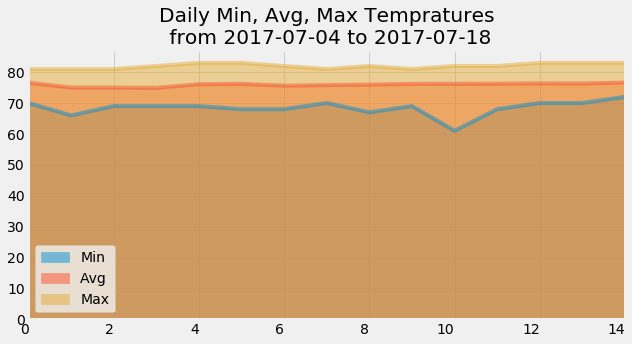

In [32]:
# Plot the daily normals as an area plot with `stacked=False`
# trip_normal_df.plot(figsize=(5,5))
trip_normal_df.plot.area(figsize=(9,5), stacked=False)
plt.title(f"Daily Min, Avg, Max Tempratures\n from {start_dt} to {end_dt}")
plt.xticks(ha="right")
plt.tight_layout()
plt.savefig('HW8-DailyNormalTemps.png') 
plt.show()

In [34]:
def monthly_normals(date):
    """Monthly Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    sel = [func.avg(Measurement.tobs)]
        
    return session.query(*sel).filter(func.strftime("%m", Measurement.date) == date).all()


#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
monthly_normals("12")

[(71.04152933421226)]

In [80]:
queryMonth = '''
             select strftime("%m", date) date, tobs 
               from measurement
             where strftime("%m", date) in ( '01', '04', '07', '10')
'''
sel_month_df = pd.read_sql_query(queryMonth, engine)
sel_month_df = sel_month_df.dropna()

sel_month01_df = sel_month_df.loc[sel_month_df["date"] == "01" ]["tobs"]
sel_month04_df = sel_month_df.loc[sel_month_df["date"] == "04" ]["tobs"]
sel_month07_df = sel_month_df.loc[sel_month_df["date"] == "07" ]["tobs"]
sel_month10_df = sel_month_df.loc[sel_month_df["date"] == "10" ]["tobs"]

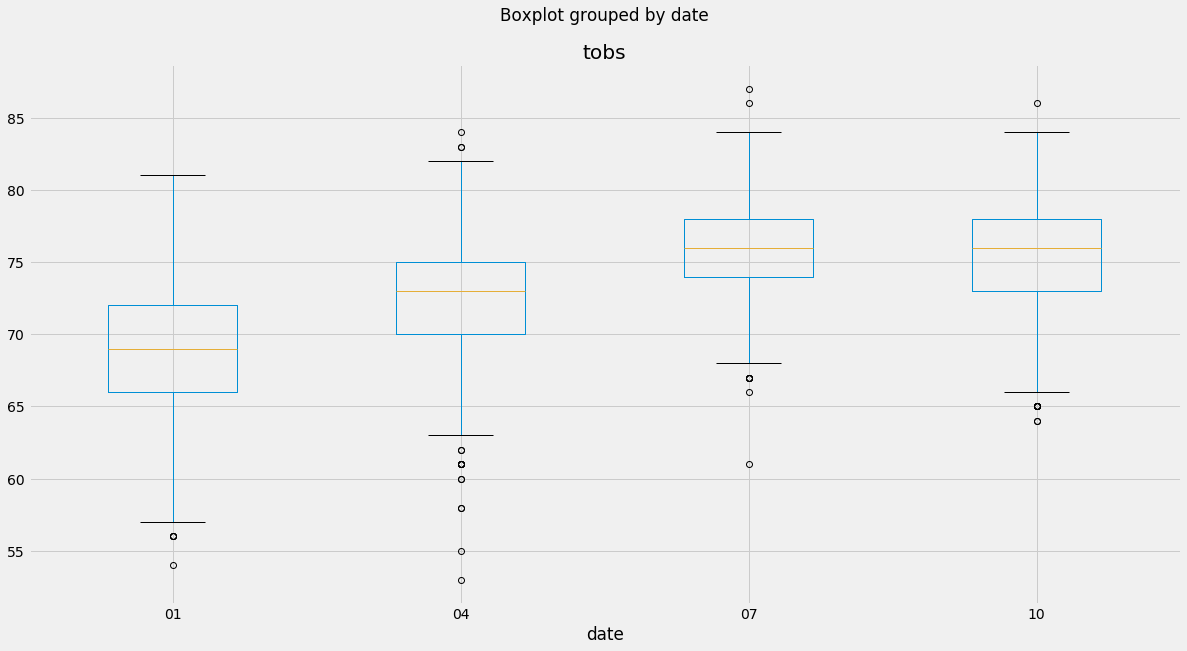

In [81]:
sel_month_df.boxplot("tobs", by="date", figsize=(20, 10))

In [82]:
import scipy.stats as stats

# Perform the ANOVA
# stats.f_oneway(jan_mean, apr_mean, jul_mean, oct_mean)
stats.f_oneway(sel_month01_df, sel_month04_df, sel_month07_df, sel_month10_df)

# low pvalue tells atleast one of these is different


F_onewayResult(statistic=1358.963885865613, pvalue=0.0)

In [84]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(sel_month01_df, sel_month04_df, equal_var=False)

Ttest_indResult(statistic=-26.519248883202042, pvalue=8.810659793230809e-141)

In [85]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(sel_month01_df, sel_month07_df, equal_var=False)

Ttest_indResult(statistic=-55.40010486444029, pvalue=0.0)

In [86]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(sel_month01_df, sel_month10_df, equal_var=False)

Ttest_indResult(statistic=-48.19788737542527, pvalue=0.0)

In [ ]:
# Low p-values above between different months temperature tells all months temperatures 
# are significantly different from each other